<a href="https://colab.research.google.com/github/Remon19/FirstRepo/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
class Perceptron():
  """perceptron classifier


  Parameters
  __________________________
  eta : float
    Learning rate (between 0.0 & 1.0)
  n_iter : int
    Number of epochs of training
  random_state : int
    Random number generator seed used for random weight initialzation.

  Attributes
  __________________________
  w_ : 1d-array 
    Weights 
  b_ : scalar
    Bias 
  errors_ : list
    Number of missclassifications (updates) in each epoch.

  """
  def __init__(self,eta,n_iter,random_state = 47):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state


  def fit(self,X,Y):
    """ Fitting training data
    
    Parameters
    ___________________________
    X : array-like, shape = [n_examples,n_features]
      Training Vectors ,where n_examples is the nuber of training examples
      and n_features is the number of features.
    Y : array-like , shape = [n_examples]
      Target values.


    returns
    ____________________________
    self : object

     """
    #rngen = np.random.RandomState(self.random_state)
    self.w_ = np.random.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
    self.b_ = np.float_(0.)
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0 
      for xi, target in zip(X,Y):
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def predict(self, X):
      return np.where(self.net_input(X) >= 0.0, 1, 0)

  def net_input(self,x):
    return np.dot(x,self.w_)+self.b_



    


In [6]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/'\
 'machine-learning-databases/iris/iris.data'

print('From URL:', s)

df = pd.read_csv(s,header = None , encoding= 'UTF-8')
df.head()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
from pandas.errors import InvalidIndexError
import matplotlib.pyplot as plt
%matplotlib inline 


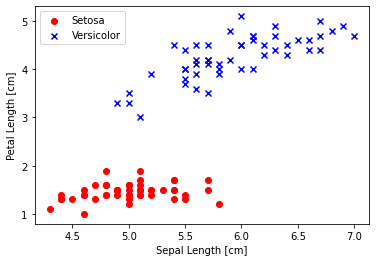

In [41]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
x = df.iloc[0:100,[0, 2]].values

plt.scatter(x[:50,0],x[:50,1],color = 'red', marker ='o', label = 'Setosa' )
plt.scatter(x[50:,0],x[50:,1],color = 'blue', marker ='x', label = 'Versicolor' )
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc = 'upper left')
plt.show()

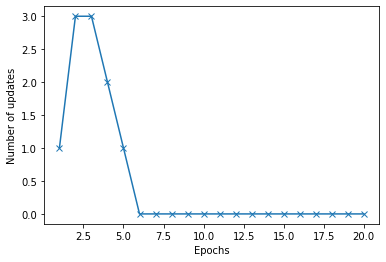

In [42]:
pp = Perceptron(eta = 0.1,n_iter = 20)
pp.fit(x,y)
plt.plot(range(1, len(pp.errors_)+1),pp.errors_, marker = 'x')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [43]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, Y, Classifier, resolution = 0.02):
  markers = ('o','s','x','v','#')
  colors = ('red','blue','green','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(Y))])


  x1_min , x1_max = X[:, 0].min() -1 , X[:, 0].max() + 1
  x2_min , x2_max = X[:, 1].min() -1 , X[:, 1].max() + 1

  xx1 , xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
  
  lab = Classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)

  plt.contourf(xx1, xx2, lab, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(Y)):
    plt.scatter(x = X[Y == cl, 0], y = X[Y == cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = f'Class {cl}',
                edgecolors= 'black'
                )




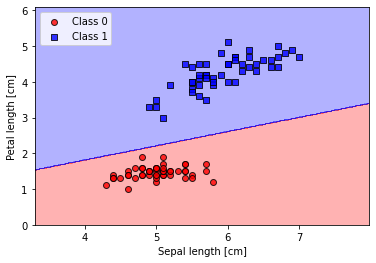

In [44]:
plot_decision_regions(x,y,Classifier = pp)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()